In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *

# plt.style.use('seaborn')
plt.style.use('default')

# from tqdm import tqdm
import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


No handles with labels found to put in legend.


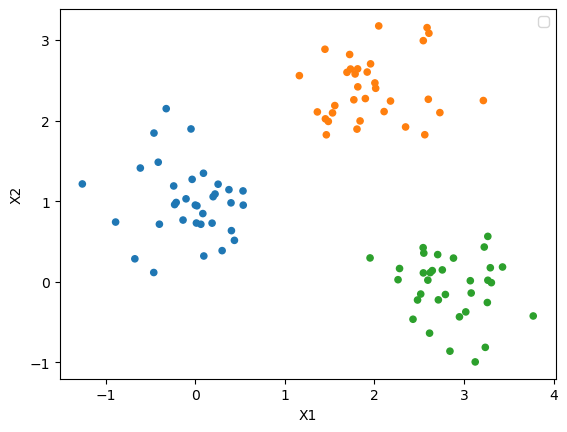

In [3]:
X, y = make_blobs(n_samples=100, centers=np.array([[0,1], [2,2.5], [3,0]]), n_features=2, cluster_std = 0.4,
                  random_state=12)
_,ax = plt.subplots(1)
df_data = pd.DataFrame(np.c_[X,y], columns = ['X1','X2','y'])

colors = {0:'C0', 1:'C1', 2:'C2'}
col = ['C0', 'C2','C1']
df_data.plot('X1', 'X2', kind = 'scatter', c = df_data['y'].map(colors),  ax= ax)

plt.legend()
plt.show()
K=3
df_data = pd.DataFrame(X, columns = ['X1','X2'])


In [4]:
colors = {0:'C0', 1:'tab:green', 2:'tab:blue', 3:'tab:orange'}


col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "D",  "^", "s"]

MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.01
E:  1.2707699881287273
E:  1.2707699881287273
E:  1.2707699881287273
Optimal solution reached with Cost:  1.2707699881287273


# of constraints added:  13
Purity, RI, ARI, NMI, AMI, homogeneity score
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


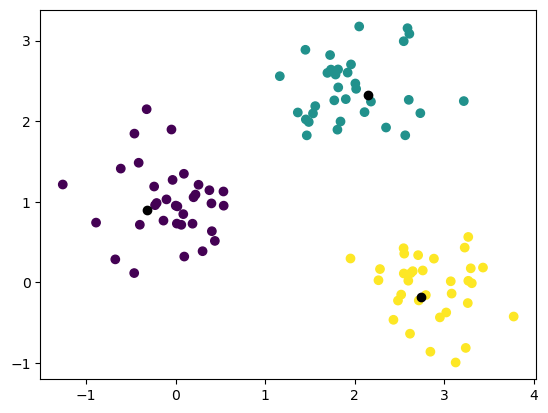

In [5]:
K = 3

clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=243)
clus.set_model(MinMax(initConstrCnt=2, optimalGap= 0.01, tol = 0.005, time = 1, initConstrIntRatio= 2))

clus.fit(df_data )

print('Purity, RI, ARI, NMI, AMI, homogeneity score')
print(clus.evaluate(y))

_,ax = plt.subplots(1)

plt.scatter(X[:,0], X[:,1], c = clus.labels)
plt.scatter(clus.cluster_centers[:,0],clus.cluster_centers[:,1], c= 'black')
plt.show()

In [6]:
len(clus.constr_gen_pts), len(clus.center_list), len(clus.addPts_list), len(clus.trueMaxPts_list)


(13, 3, 3, 3)

In [70]:
plt.rcParams.update({'font.size': 18})


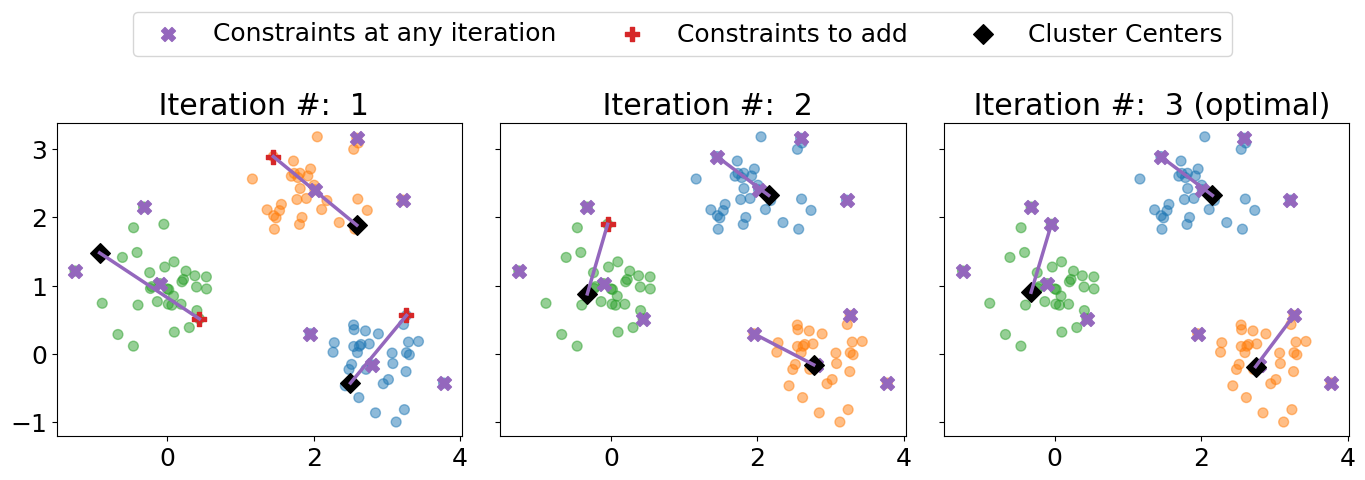

In [84]:
fig, ax = plt.subplots(1, 3, figsize = (14,5), sharey=True)


for i in range(0,len(clus.center_list),1):

    
    
    clus.df_data_list[i].plot('X1', 'X2', kind = 'scatter', c = clus.df_data_list[i]['trueCluster'].map(colors),  ax= ax[i] , legend = False , alpha = 0.5, s = 50)
    # clus.df_data_list[i].plot('X1', 'X2', kind = 'scatter',  ax= ax , legend = False , c = 'C0', alpha = 0.7)

    ax[i].scatter(X[list(clus.initContrs),0],X[list(clus.initContrs),1], c = col[4], marker= 'X', s = 100, label = "Constraints at any iteration" )
    # "$\\it{I}$"


    ax[i].scatter(X[list(flatten(clus.addPts_list[0:i]))][:,0], X[list(flatten(clus.addPts_list[0:i]))][:,1], c = col[4],s = 100,marker= 'X',)
    if i != len(clus.center_list)-1:
        ax[i].scatter(X[list(flatten(clus.addPts_list[i]))][:,0], X[list(flatten(clus.addPts_list[i]))][:,1], c = col[3],s = 100,marker= 'P',label = "Constraints to add")
    ax[i].scatter(clus.center_list[i][:,0], clus.center_list[i][:,1], c = 'black', marker = 'D', s = 100, label = "Cluster Centers")

    for k in range(K):
        ax[i].plot(np.r_[clus.center_list[i][k,0] , X[clus.trueMaxPts_list[i][k],0]],np.r_[clus.center_list[i][k,1] , X[clus.trueMaxPts_list[i][k],1]], c = col[4],alpha =1,linewidth = 2.5)

    # ax[i].set_xticks([])
    # ax[i].set_yticks([])

    ax[i].set_xlabel('')
    ax[i].set_ylabel('')    
    # ax[i].set_title('\n\n Progress:  ' + str(round((i+1)*100/len(clus.center_list),0)) + '%')
    ax[i].set_title('\n\n Iteration #:  ' + str(i+1) )
    if i == 2:
        ax[i].set_title('\n\n Iteration #:  ' + str(i+1) +' (optimal)')



fig.tight_layout()

handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=3, fontsize = 22, scatterpoints = 1,markerscale =1.25 )
fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=3,scatterpoints = 1,markerscale =1 )

plt.savefig(f'{RESULT_DIR}/ConstrGen.pdf', bbox_inches = 'tight')

plt.show()